In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Obtengo los datos de producción de energía en el mundo de la ONU:

In [129]:
url= 'http://data.un.org/_Docs/SYB/CSV/SYB63_263_202009_Production,%20Trade%20and%20Supply%20of%20Energy.csv'
df= pd.read_csv(url,header=0, skiprows=1)

In [130]:
df.head()

,Region/Country/Area,Unnamed: 1,Year,Series,Value,Footnotes,Source
0,1,"Total, all countries or areas",1990,Primary energy production (petajoules),361763.0,NaN,"United Nations Statistics Division, New York, ..."
1,1,"Total, all countries or areas",1995,Primary energy production (petajoules),381604.0,NaN,"United Nations Statistics Division, New York, ..."
2,1,"Total, all countries or areas",2000,Primary energy production (petajoules),412860.0,NaN,"United Nations Statistics Division, New York, ..."
3,1,"Total, all countries or areas",2005,Primary energy production (petajoules),477404.0,NaN,"United Nations Statistics Division, New York, ..."
4,1,"Total, all countries or areas",2010,Primary energy production (petajoules),530934.0,NaN,"United Nations Statistics Division, New York, ..."


In [131]:
df.drop(columns=['Region/Country/Area','Footnotes'], inplace=True)
df.rename(columns={'Unnamed: 1': 'Country/Region'}, inplace=True)


In [132]:
df['Series'].unique()
df['Country/Region'].unique()

array(['Total, all countries or areas', 'Africa', 'North America',
       'South America', 'Asia', 'Europe', 'Oceania', 'Afghanistan',
       'Albania', 'Algeria', 'Andorra', 'Angola', 'Anguilla',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia (Plurin. State of)',
       'Bonaire, St. Eustatius & Saba', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'China, Hong Kong SAR', 'China, Macao SAR', 'Colombia', 'Comoros',
       'Congo', 'Cook Islands', 'Costa Rica', 'Côte d’Ivoire', 'Croatia',
       'Cuba', 'Curaçao', 'Cyprus', 'Czechia', "Dem. People's Rep. Kore

                    Country/Region  Year                     Series     Value  \
31   Total, all countries or areas  2017  Total supply (petajoules)  563396.0   
71                          Africa  2017  Total supply (petajoules)   32562.0   
111                  North America  2017  Total supply (petajoules)  113499.0   
151                  South America  2017  Total supply (petajoules)   24158.0   
191                           Asia  2017  Total supply (petajoules)  279048.0   

                                                Source  
31   United Nations Statistics Division, New York, ...  
71   United Nations Statistics Division, New York, ...  
111  United Nations Statistics Division, New York, ...  
151  United Nations Statistics Division, New York, ...  
191  United Nations Statistics Division, New York, ...  


([], [])

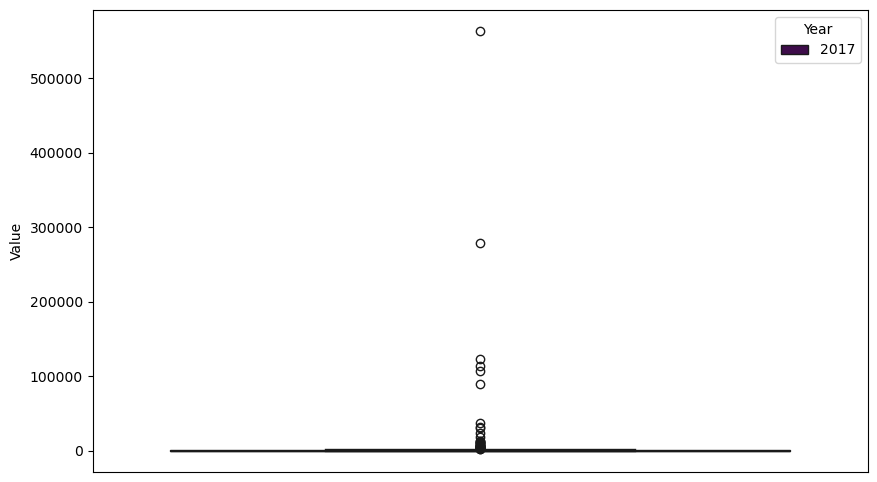

In [136]:
df_all_countries_energy_2017= df[(df['Series']== 'Total supply (petajoules)') & (df['Year']==2017)]
print(df_all_countries_energy_2017.head())
plt.figure(figsize=(10, 6))
sns.boxplot(x= 'Year', y='Value', data=df_all_countries_energy_2017, palette= 'viridis', hue='Year', showfliers= True)
plt.xlabel('')
plt.xticks([])

Hay outliers:

In [140]:
q1= df_all_countries_energy_2017['Value'].quantile(0.25)
q3= df_all_countries_energy_2017['Value'].quantile(0.75)
iqr= q3-q1

inf= q1-1.5*iqr
sup= q3+1.5*iqr

outliers= df_all_countries_energy_2017[(df_all_countries_energy_2017['Value']<inf) | (df_all_countries_energy_2017['Value']>sup)]

display(outliers[['Country/Region', 'Value']])

,Country/Region,Value
31,"Total, all countries or areas",563396.0
71,Africa,32562.0
111,North America,113499.0
151,South America,24158.0
191,Asia,279048.0
231,Europe,107510.0
271,Oceania,6619.0
555,Argentina,3385.0
660,Australia,5353.0
1268,Brazil,12900.0


In [70]:
df_countries= df[df['Country'].isin(['Uruguay', 'Argentina', 'Chile', 'Spain', 'Indonesia', 'South Africa', 'New Zealand'])]
df_countries.head()

,Country,Year,Value,Source
524,Argentina,1990,2064.0,"United Nations Statistics Division, New York, ..."
525,Argentina,1995,2722.0,"United Nations Statistics Division, New York, ..."
526,Argentina,2000,3413.0,"United Nations Statistics Division, New York, ..."
527,Argentina,2005,3609.0,"United Nations Statistics Division, New York, ..."
528,Argentina,2010,3343.0,"United Nations Statistics Division, New York, ..."
